In [48]:
import keras
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [49]:
from keras.datasets import mnist ## Data set is imported here
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [78]:
image_rows, image_cols = 28, 28
batch_size = 256
num_classes = 10
epochs = 10

In [80]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [81]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [82]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [83]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, image_rows, image_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, image_rows, image_cols)
    input_shape = (1, image_rows, image_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], image_rows, image_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)
    input_shape = (image_rows, image_cols, 1)

In [84]:
model = Sequential()

In [85]:
model.add(Conv2D(20, (5, 5), padding="same",input_shape=input_shape))

In [86]:
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [87]:
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [88]:
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

In [89]:
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [90]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [91]:
theLeNetModel = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.2736 - acc: 0.9127 - val_loss: 0.1051 - val_acc: 0.9649
Epoch 2/10
60000/60000 [==============================] - 37s 622us/step - loss: 0.0590 - acc: 0.9813 - val_loss: 0.0490 - val_acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.0387 - acc: 0.9879 - val_loss: 0.0939 - val_acc: 0.9671
Epoch 4/10
60000/60000 [==============================] - 37s 625us/step - loss: 0.0285 - acc: 0.9910 - val_loss: 0.0267 - val_acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.0215 - acc: 0.9933 - val_loss: 0.0305 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.0164 - acc: 0.9949 - val_loss: 0.0228 - val_acc: 0.9920
Epoch 7/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.

In [92]:
score = model.evaluate(x_test, y_test, verbose=0)


Text(0, 0.5, 'acc')

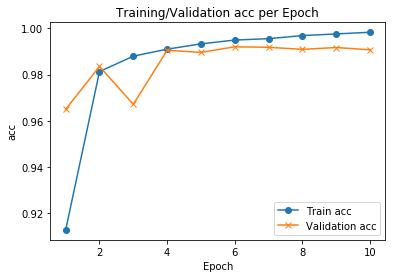

In [93]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + theLeNetModel.history['acc'], 'o-')
ax.plot([None] + theLeNetModel.history['val_acc'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

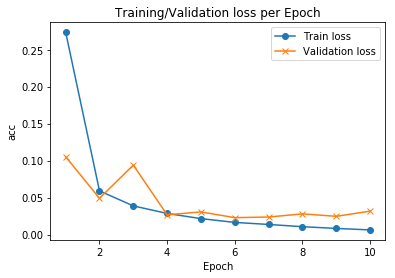

In [94]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + theLeNetModel.history['loss'], 'o-')
ax.plot([None] + theLeNetModel.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')